In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
cond_counts = pd.read_csv("results/condition_counts.csv")\
    .set_index(['version', 'condition', 'counterbalance'])\
    .unstack('version')
cond_counts

num_participants        
version                                  G   H   I
condition counterbalance                          
0         0                             11  10  20
          1                              9  11  21
1         0                             10   9  21
          1                             10  10  20
2         0                             11  10  20
          1                             11  11  19
3         0                             12  10  20
          1                             11  10  20
4         0                            NaN NaN  20
          1                            NaN NaN  20
5         0                            NaN NaN  21
          1                            NaN NaN  20
6         0                            NaN NaN  20
          1                            NaN NaN  20
7         0                            NaN NaN  20
          1                            NaN NaN  20
8         0                            NaN NaN  20
          1                            NaN NaN  20
9         0                            NaN NaN  20
          1                            NaN NaN  19

In [3]:
pd.read_csv("results/num_participants.csv", index_col="version").T

version,G,H,I
duplicate_trials,7,0,0
failed_posttest,15,19,79
incomplete,18,21,75
ok,85,81,401
repeat_worker,4,1,7
complete,111,101,487
excluded,26,20,86


Participants were paid either \$1.25 (Experiment 1), \$1.00 (Experiment 2), or \$0.70 (Experiment 3):

In [4]:
pd.read_csv("results/payrate.csv").set_index('version')

,mean_pay,mean_time,median_time
version,,,
G,3.558558,0:19:29.353635,0:16:10.607000
H,4.886384,0:16:15.806728,0:14:38.268000
I,4.850309,0:09:20.487813,0:08:19.828000


---

## Results

#### "Will it fall?" responses from block A

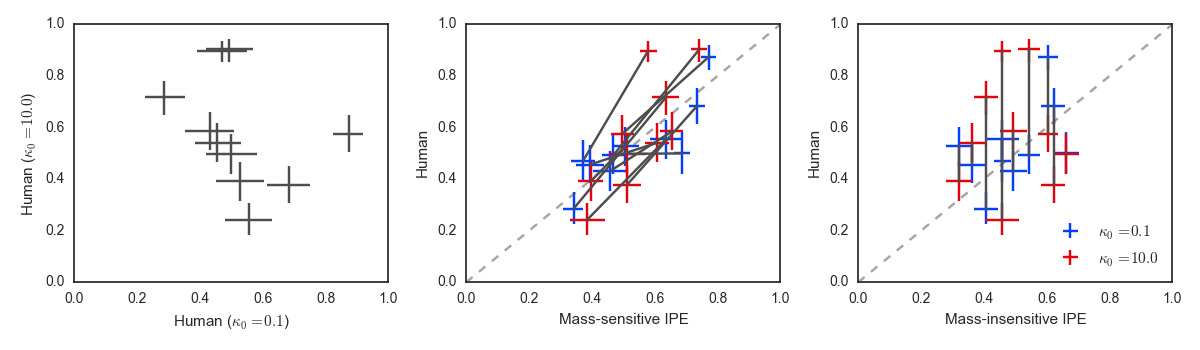

In [5]:
# plot "will it fall?" responses for block A
Image("figures/fall_responses_GH_A.png")

These are the corresponding Pearson correlations for the above plots (`ModelIS` is the mass-insensitive IPE, and `ModelS` is the mass-sensitive IPE).

In [6]:
pd.read_csv("results/fall_response_corrs.csv").set_index(['block', 'X', 'Y', 'query']).sortlevel().ix['A']

lower    median     upper
X       Y     query                                            
Human   Human more_than_half_fell -0.791766 -0.359052  0.031448
              more_than_one_fell  -0.784620 -0.363136  0.033977
              percent_fell        -0.757944 -0.357438  0.026418
ModelIS Human more_than_half_fell -0.240856  0.168573  0.536817
              more_than_one_fell   0.087051  0.379665  0.617671
              percent_fell        -0.119027  0.224519  0.529314
ModelS  Human more_than_half_fell  0.495220  0.751567  0.893984
              more_than_one_fell   0.486240  0.669804  0.817728
              percent_fell         0.562932  0.788485  0.912163

---

#### "Will it fall?" responses from block B

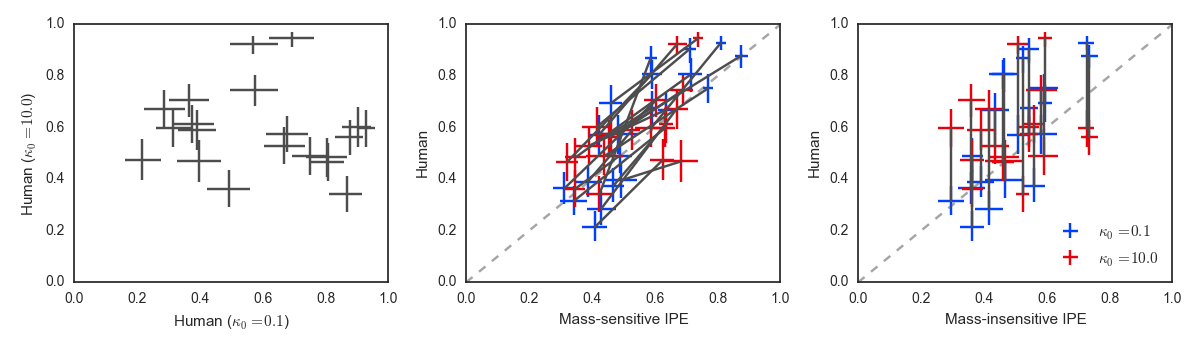

In [7]:
# plot "will it fall?" responses for block B
Image("figures/fall_responses_GH_B.png")

These are the corresponding Pearson correlations for the above plots (`ModelIS` is the mass-insensitive IPE, and `ModelS` is the mass-sensitive IPE).

In [8]:
pd.read_csv("results/fall_response_corrs.csv").set_index(['block', 'X', 'Y', 'query']).sortlevel().ix['B']

lower    median     upper
X       Y     query                                            
Human   Human more_than_half_fell -0.482354 -0.130075  0.190833
              more_than_one_fell  -0.479958 -0.129658  0.200058
              percent_fell        -0.487881 -0.136379  0.191967
ModelIS Human more_than_half_fell  0.140765  0.409954  0.626472
              more_than_one_fell   0.226993  0.473616  0.663628
              percent_fell         0.260542  0.495020  0.689483
ModelS  Human more_than_half_fell  0.599325  0.749518  0.851362
              more_than_one_fell   0.587224  0.724463  0.832868
              percent_fell         0.655686  0.786259  0.868554

---

#### Overall accuracy

As shown by the following table, people are (across stimuli) above chance at determining the heavier color, regardless of the mass ratio:

In [9]:
pd.read_csv("results/human_mass_accuracy.csv")\
    .set_index(['version', 'kappa0'])\
    .sortlevel()\
    .ix['H']

,N,lower,median,upper
kappa0,,,,
-1.0,840,0.785681,0.812971,0.838357
1.0,780,0.796480,0.824220,0.849837
all,1620,0.799191,0.818453,0.836709


Specifically, significantly above chance on 31 of these stimuli, and not significantly above chance for 9 of these stimuli (using Bonferroni correction for multiple comparisons):

In [10]:
pd.read_csv("results/num_chance.csv").groupby('version')['0.00125'].sum()

version
G          18
H           9
I           2
Name: 0.00125, dtype: float64

---

### How do people infer mass?

#### Human vs. model accuracy

Are the stimuli that people are better at inferring mass from the same stimuli that the model is good at inferring mass from? We see that the original IPE is not very correlated with people, but the IPE based off of people's "fall?" judgments is:

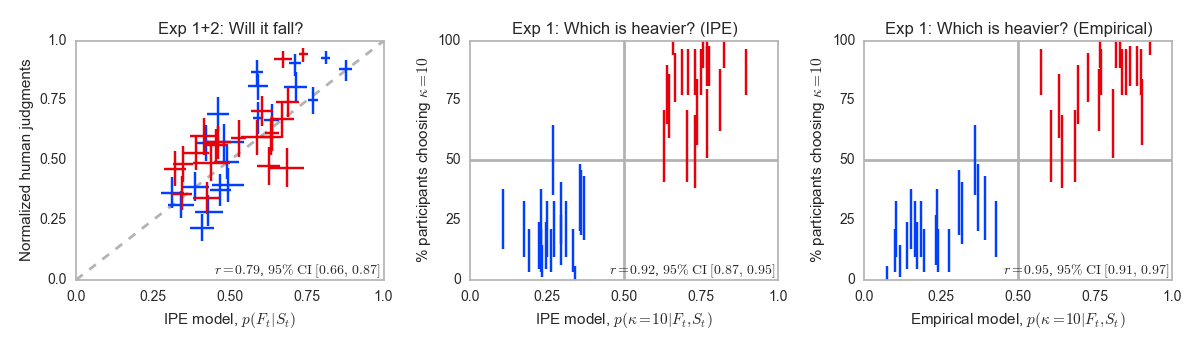

In [11]:
Image("figures/model_results.png")

In [12]:
pd.read_csv("results/mass_responses_by_stimulus_corrs.csv")\
    .set_index(['version', 'counterfactual', 'model', 'fitted', 'likelihood'])\
    .sortlevel()\
    .ix[('H', True, 'static', False)]

,lower,median,upper
likelihood,,,
empirical,0.910949,0.947468,0.971988
ipe,0.872192,0.918331,0.952883


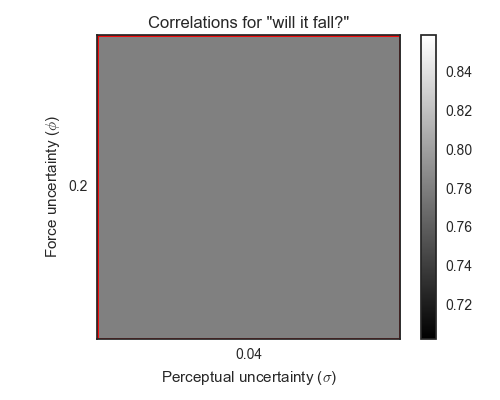

In [13]:
Image("figures/fall_responses_best_parameters.png")

---

### Do people integrate information over time?

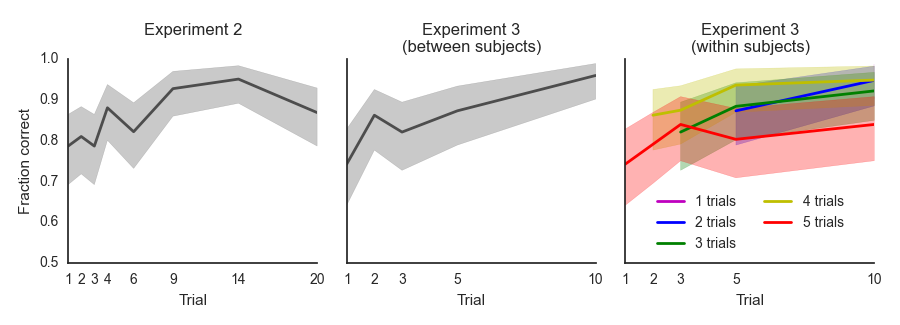

In [14]:
Image("figures/mass_accuracy_by_trial.png")

In [15]:
pd.read_csv("results/mass_accuracy_by_trial_corrs.csv")\
    .set_index(['version', 'num_mass_trials'])\
    .sortlevel()

lower    median     upper
version num_mass_trials                              
G        8               0.240981  0.682647  0.904762
H        20             -0.190924  0.074746  0.343535
I       -1               0.400000  0.700000  1.000000
         1                    NaN       NaN       NaN
         2              -1.000000  1.000000       NaN
         3               0.000000  1.000000  1.000000
         4               0.105409  0.800000  1.000000
         5              -0.359092  0.600000  1.000000

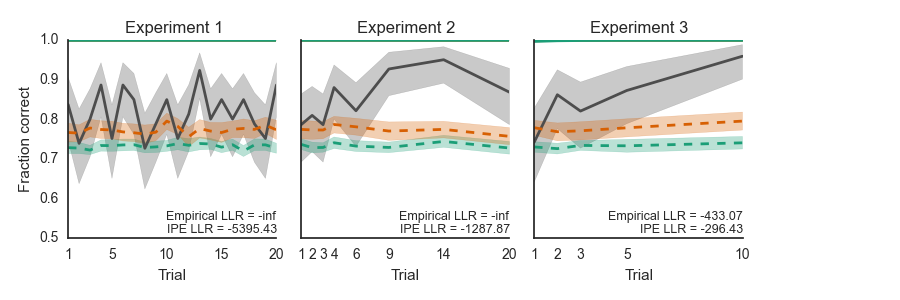

In [16]:
Image("figures/mass_accuracy_by_trial_with_model.png")

In [17]:
pd.read_csv("results/model_log_lh_ratios.csv")\
    .set_index(['counterfactual', 'fitted', 'version', 'num_mass_trials', 'likelihood'])\
    .sortlevel()\
    .ix[(True, True)]

llhr model_favored
version num_mass_trials likelihood                          
G        8              empirical    63.125649      learning
                        ipe          67.933592      learning
H        20             empirical   -29.832378        static
                        ipe           6.448159      learning
I       -1              empirical    84.014616      learning
                        ipe         101.007851      learning
         1              empirical    21.323262      learning
                        ipe          27.119305      learning
         2              empirical    39.376879      learning
                        ipe          48.486934      learning
         3              empirical    48.657042      learning
                        ipe          59.907665      learning
         4              empirical    63.878544      learning
                        ipe          77.757112      learning
         5              empirical    55.268782      learning
                        ipe          65.400773      learning

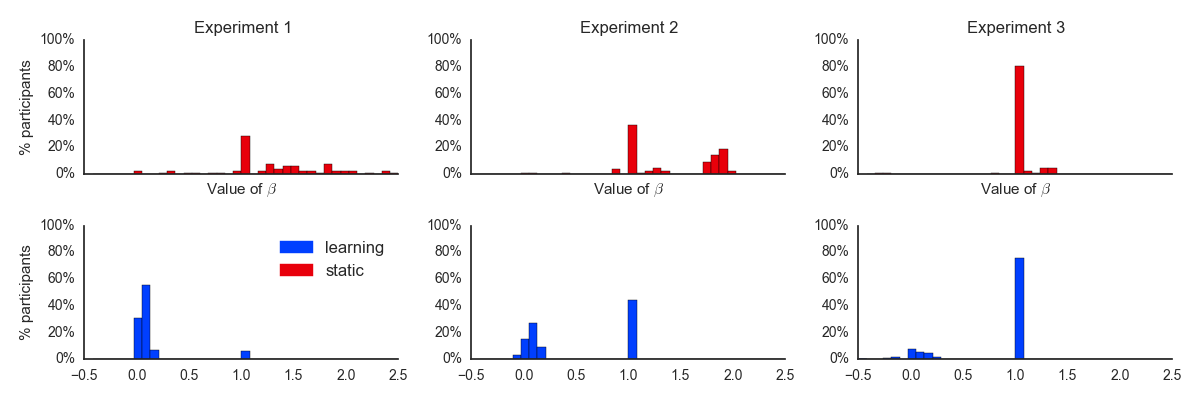

In [18]:
Image("figures/model_params.png")